# Abalone Case Study

**Problem Statement**<br>The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

**Solution that we are looking for**<br>
With the available data points we will have to predict the age of the Abalone

**Features details**<br>
**Name / Data Type / Measurement Unit / Description**<br>
Sex / nominal / -- / M, F, and I (infant)<br>
Length / continuous / mm / Longest shell measurement<br>
Diameter / continuous / mm / perpendicular to length<br>
Height / continuous / mm / with meat in shell<br>
Whole weight / continuous / grams / whole abalone<br>
Shucked weight / continuous / grams / weight of meat<br>
Viscera weight / continuous / grams / gut weight (after bleeding)<br>
Shell weight / continuous / grams / after being dried<br>
Rings / integer / -- / +1.5 gives the age in years

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# loading the dataset from local drive
abalone_ds = pd.read_csv("Abalon.csv")
abalone_ds.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# checking data's shape and missing values by applying info function and creating a copy as well
abalone_ds1 = abalone_ds.copy()

# checking the info
abalone_ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**Obseration**<br>
1.Dataset has 8 columns including target column also.<br>
2.it has 4176 observations<br>
3.There is no missing values found in the dataset<br>
4.all the features are float and int except one which is sex column which is object type

In [4]:
# changing the sex column to numeric by encoding
# Male is converted into 1 and Female is 2 and infant 0
abalone_ds1["Sex"] =  abalone_ds1["Sex"].replace({"I":0,"M":1,"F":2})
# converting the datatype of the sex column to int
abalone_ds1["Sex"] =abalone_ds1["Sex"].astype("str").astype("int32")
abalone_ds1.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

**Observation**<br>
1.> Sex column has been encoded and values have been changed to int ( Infant =0 , male = 1, female =3)<br>
2.> after changing values of the columns, have changed the datatype of the column for further calculation<br>

In [5]:
#Changing Rings columns into age in years columns
abalone_ds1["Age"] =  abalone_ds1["Rings"] + 1.5
abalone_ds1.drop("Rings",axis = 1, inplace = True)
abalone_ds1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


**Observation**<br>
>1. it is said that adding 1.5 to each observation in Rings column and it will tell the age of the abalone<br>
>2. one seprate age columns has been created by adding 1.5 to Rings and Rings column is deleted since it will not have any point to keep after age column<br>

In [6]:
abalone_ds1.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.991621,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.796410,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


**Observation**
1. scale of the dataset columns are <3 except target column(age)<br>
3. min age is 2.5, 75% percentile age is below 13

# Univariate Analysis

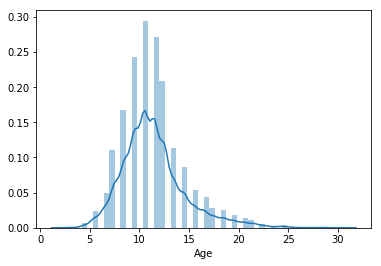

In [7]:
# Target feature distribution 
sns.distplot(abalone_ds1["Age"])

**Observation**<br>
1. it is target variable and looking at the distribution it seems that maximum abalone'age  fall under 7 to 15 age group

1    1528
0    1342
2    1307
Name: Sex, dtype: int64
% of infant(0) in overall data 32.12832176203017
% of Male(1) in overall data 36.58127842949485
% of Female(2) in overall data 31.290399808474984


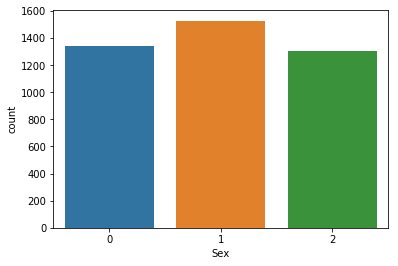

In [8]:
print(abalone_ds1["Sex"].value_counts())
print("% of infant(0) in overall data",abalone_ds1["Sex"].value_counts()[0]/len(abalone_ds1["Sex"])*100)
print("% of Male(1) in overall data",abalone_ds1["Sex"].value_counts()[1]/len(abalone_ds1["Sex"])*100)
print("% of Female(2) in overall data",abalone_ds1["Sex"].value_counts()[2]/len(abalone_ds1["Sex"])*100)
sns.countplot(x ="Sex", data = abalone_ds1);

**Observation**<br>
1. Data is almost equally distributed in all 3 sex columns category, which shows that it is not inclide to one particular gender

Sex
0     9.413767
1    11.959478
2    12.330264
Name: Age, dtype: float64


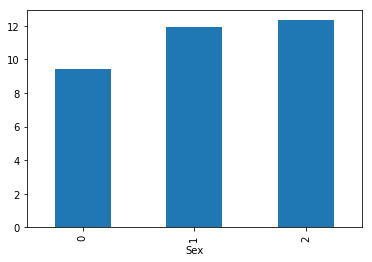

In [61]:
print(abalone_ds1.groupby("Sex")["Age"].mean())
abalone_ds1.groupby("Sex")["Age"].mean().plot(kind= "bar")

**observation**<br>
on an average female age is greater than male

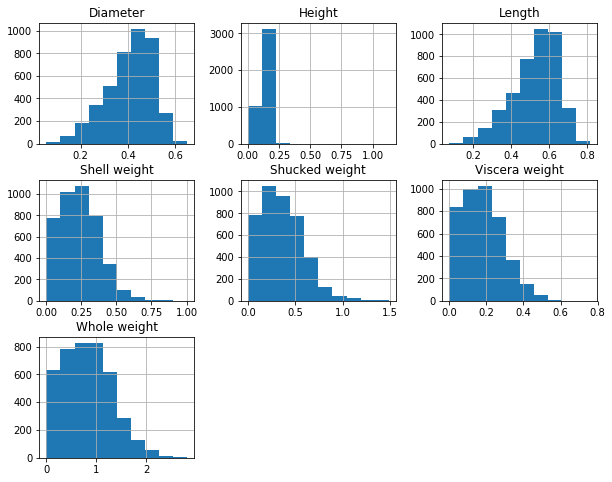

In [9]:
# distribution of the data
abalone_ds1.iloc[:,1:-1].hist(figsize=(10,8));

**Observation**
Lenght, diameter,height are left skewed and whole weight,shucked weight, viscera weight and shell weight are right skewed

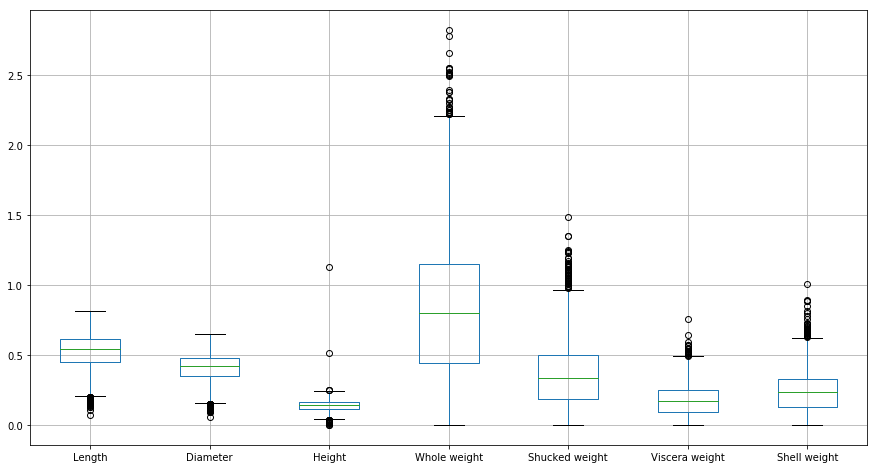

In [11]:
# checking outlier 
abalone_ds1.iloc[:,1:-1].boxplot(figsize=(15,8))

**Observation**<br>
it has been clearly orbsered that all the columns have outlier.<br> 
We will the z score for outlier treatment

# Bivariate Analysis

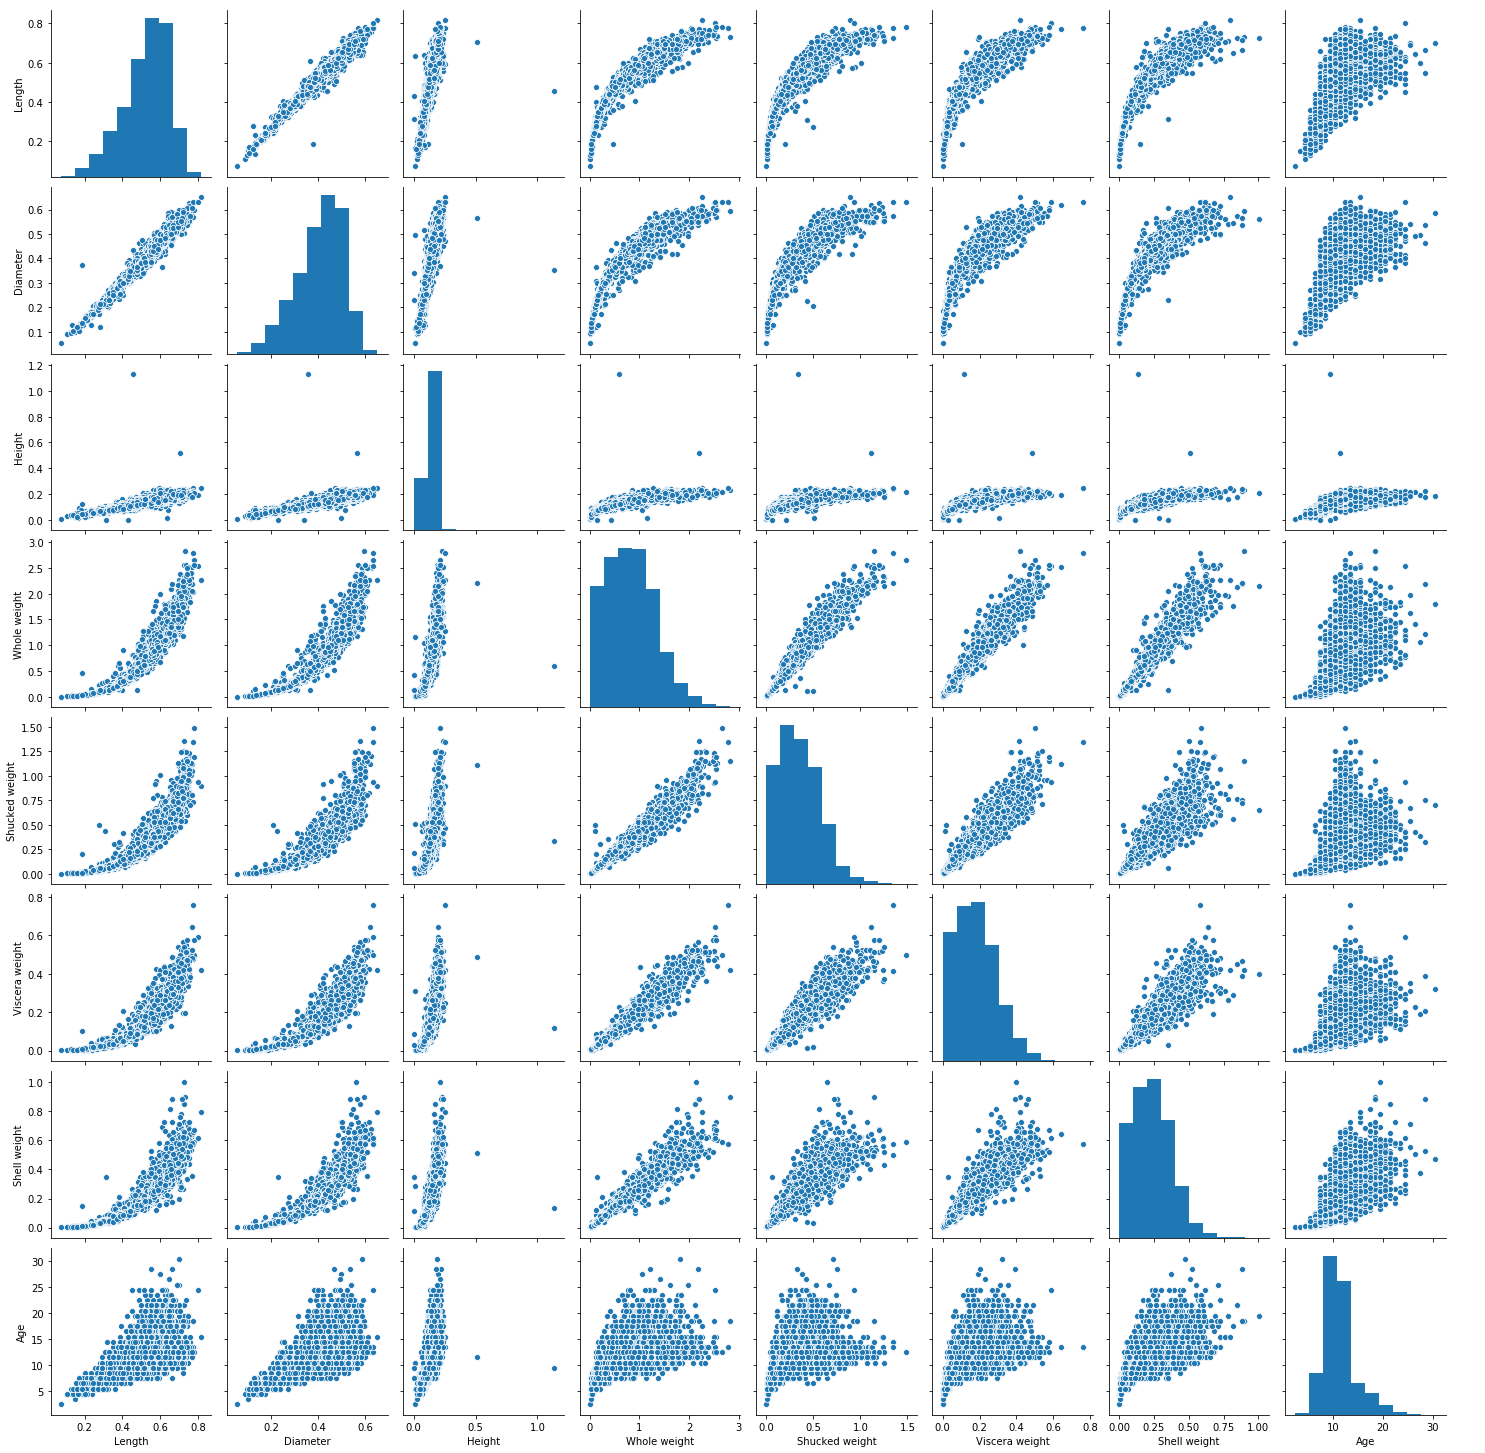

In [10]:
sns.pairplot(abalone_ds1.iloc[:,1::]) # checking the relation of the features

**Observation**
correlation is positive between individual and individual to target columns 

In [12]:
# treating outlier
z_score = np.abs(zscore(abalone_ds1))
abalone_ds1 = abalone_ds1[(z_score <3).all(axis =1)]                  

Text(0.5, 1.0, 'Correlation Plot')

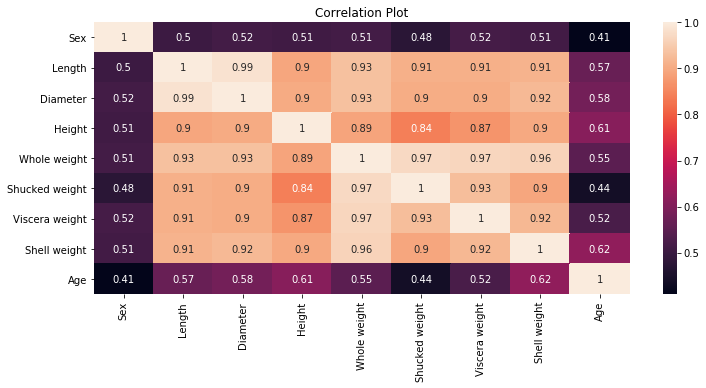

In [13]:
# checking correlation
plt.figure(figsize =(12,5))
sns.heatmap(abalone_ds1.corr(),annot =True)
plt.title("Correlation Plot")

**Observation**<br>
we can see the correlation between individuals and target column and how much they relate

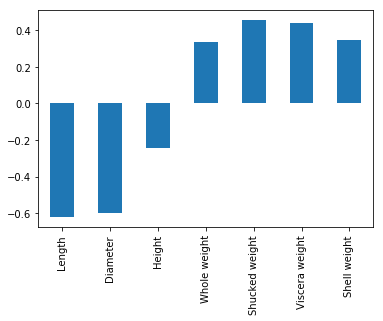

In [14]:
# Checking the skewness of the data
abalone_ds1.iloc[:,1:-1].skew().plot(kind ="bar")

**Observation**<br>
1. Lenght,diameter and height are negetive skewed which is already seen that these are left skewed distributed.
2. considering 0.5 is the treshold, thus appyling power transformer for these columns transformation  

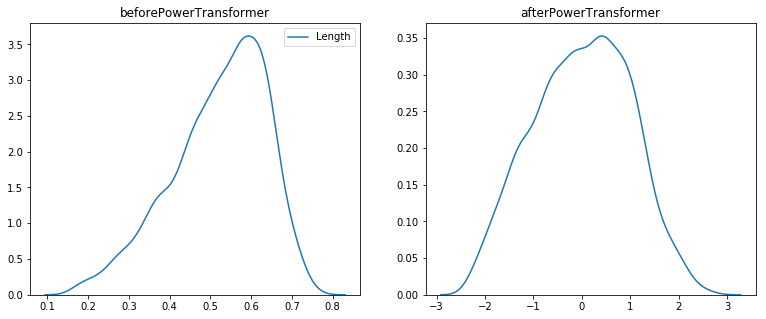

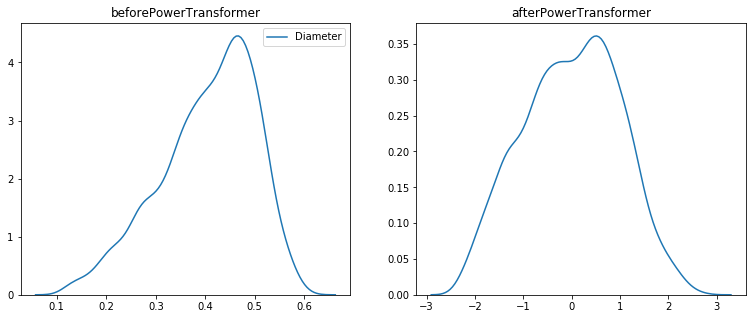

In [15]:
# Creating a functon which will take a dataset,variale of the dataset and tranformer method
# subplot will help in identifing share of variable before and after tranformation
def plots(dataset, var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(dataset[var])
    plt.title("before" + str(t).split('(')[0])
    
    plt.subplot(122)
    p = t.fit_transform(dataset[[var]]).flatten()
    sns.kdeplot(p)
    plt.title("after" + str(t).split('(')[0])

PT = PowerTransformer(method='yeo-johnson') # powertransformer instance creation 
X = abalone_ds1[["Length","Diameter"]]
for i in X.columns:
    plots(X,i,PT)


Post allying the power transformer, feature's shape has been changed and distribution range has been +3 to -3

# Modeling

In [16]:
def transformed_data_addition(dataset):
    dataset["trans_length"] = X["Length"]
    dataset["trans_Diameter"] = X["Diameter"]
    dataset.drop(columns = ["Length","Diameter"],axis = 1, inplace = True)
transformed_data_addition(abalone_ds1)

In [23]:
# data is ready and now we can seprate it into X and y for modeling purpose
X = abalone_ds1.drop("Age",axis = 1)
y = abalone_ds1["Age"]

# seprating data into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 150)

# taking all models in a list
models = [KNeighborsRegressor(),DecisionTreeRegressor(),SVR(),RandomForestRegressor()]

# running loop for differents model\
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    MSE = mean_squared_error(pred,y_test)
    print("Mean_squared_error",model,MSE)
    print("RMSE",model, np.sqrt(MSE) )
    print("r_score",model,r2_score(y_test,pred)*100)
    print("\n")


Mean_squared_error KNeighborsRegressor() 4.244714640198512
RMSE KNeighborsRegressor() 2.060270525974323
r_score KNeighborsRegressor() 48.32130335471556


Mean_squared_error DecisionTreeRegressor() 8.405707196029777
RMSE DecisionTreeRegressor() 2.899259766911164
r_score DecisionTreeRegressor() -2.338090800938253


Mean_squared_error SVR() 4.1594512881731625
RMSE SVR() 2.0394732869476773
r_score SVR() 49.35937052242323


Mean_squared_error RandomForestRegressor() 3.9273718362282874
RMSE RandomForestRegressor() 1.9817597826750566
r_score RandomForestRegressor() 52.18489935328526




**observation**<br>
1. Data has been seperated into X and Y, Y contain only target feature which is Age and rest are all into X<br>
2. data has been trained on multiple machine leaning model.<br>
3. mean_squared_error and r_score has been used as model evalution matrix<br>
4. out of al 4 models, Randomforest has minimum MSE and high R_score. thus choosing it as final Model<br>

In [32]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

RF = RandomForestRegressor()
parameter = {"criterion" : ["mse", "mae"],
            "max_features" : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2, 5, 10],
            "min_samples_leaf": [1,2,3,4,5]}

grid = RandomizedSearchCV(RF, parameter,cv =5,n_jobs= -1, verbose= 2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 5, 10]},
                   verbose=2)

In [45]:
print("score",grid.best_score_)
print("best parameter",grid.best_params_)

score 0.5528307436487
best parameter {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'criterion': 'mse'}


In [54]:
RF_best_param = RandomForestRegressor(n_estimators = 150,min_samples_split = 5,min_samples_leaf= 4,max_features = 'log2', criterion ="mse")
for i in range(2,7):
    cv= cross_val_score(RF_best_param,X,y,cv= 3)
    print("mean CV at" ,i,cv.mean())
    print("std CV at", i,cv.std())
    


mean CV at 2 0.5425052616106215
std CV at 2 0.007152890639780418
mean CV at 3 0.538881297758652
std CV at 3 0.0019002145969020108
mean CV at 4 0.4834757520679892
std CV at 4 0.1011257810936983
mean CV at 5 0.4817927474342095
std CV at 5 0.07824524679194039
mean CV at 6 0.4901257764011224
std CV at 6 0.09744557920700292


**Observation**
3rd iteration Cross_validation gives good score

In [56]:
final_cv= cross_val_score(RF_best_param,X,y,cv= 3)
print("mean",final_cv.mean())
print("std ",final_cv.std())

mean 0.5381316675935094
std  0.0002954510689731835


**observation**
1. since we have selected Randomforestregressor as the final for model, we have applied randomized search CV for hypertuning and trained model with best parameters<br>
2. Basis on the best paramater, we have used cross_validation<br>
3. cross validaion with 3 iteration it gives best score ( mean wit 0.0002 standard deviation)<br>
4. saving the model with this

In [49]:
# Saving model into pkl file
import pickle
filename = "abalone.pkl"
pickle.dump(RF_best_param, open(filename,"wb"))